# 🧠 AI Feedback Categorizer with Hugging Face Transformers
This notebook analyzes user feedback using zero-shot classification, sentiment analysis, and keyword extraction.

## 📦 Step 1: Install Dependencies

In [1]:
!pip install pandas streamlit scikit-learn matplotlib seaborn transformers torch

Defaulting to user installation because normal site-packages is not writeable


## 🧪 Step 2: Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from transformers import pipeline
import IPython.display as display

## 🗃️ Step 3: Load Feedback Data

In [3]:
data = [
    {"feedback": "The app crashes every time I try to upload a photo.", "source": "Google Play", "timestamp": "2025-06-01"},
    {"feedback": "Love the new dark mode feature!", "source": "App Store", "timestamp": "2025-06-02"},
    {"feedback": "Can you add support for multiple accounts?", "source": "Email", "timestamp": "2025-06-03"},
    {"feedback": "Customer support was very helpful.", "source": "Trustpilot", "timestamp": "2025-06-04"},
    {"feedback": "The login process is too slow.", "source": "Google Play", "timestamp": "2025-06-05"},
]
df = pd.DataFrame(data)
df.head()

,feedback,source,timestamp
0,The app crashes every time I try to upload a p...,Google Play,2025-06-01
1,Love the new dark mode feature!,App Store,2025-06-02
2,Can you add support for multiple accounts?,Email,2025-06-03
3,Customer support was very helpful.,Trustpilot,2025-06-04
4,The login process is too slow.,Google Play,2025-06-05


## 🤗 Step 4: Load Hugging Face Pipelines

In [4]:
# Load Transformers
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")
sentiment_analyzer = pipeline("sentiment-analysis")

Device set to use cpu
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


## 🧠 Step 5: Classify Categories, Analyze Sentiment, and Determine Urgency

In [5]:
# Define categories
categories = ["Bug", "Feature Request", "Complaint", "Compliment", "General"]

def classify_and_analyze(feedback):
    class_result = classifier(feedback, categories, multi_label=True)
    assigned = [label for label, score in zip(class_result['labels'], class_result['scores']) if score > 0.5]
    if not assigned:
        assigned = ["General"]
    sentiment_result = sentiment_analyzer(feedback)[0]
    sentiment = sentiment_result['label']
    if "Bug" in assigned or "Complaint" in assigned:
        urgency = "High"
    elif "Feature Request" in assigned:
        urgency = "Medium"
    else:
        urgency = "Low"
    return pd.Series([assigned, sentiment, urgency])

df[['categories', 'sentiment', 'urgency']] = df['feedback'].apply(classify_and_analyze)
df

,feedback,source,timestamp,categories,sentiment,urgency
0,The app crashes every time I try to upload a p...,Google Play,2025-06-01,"[Complaint, Bug]",NEGATIVE,High
1,Love the new dark mode feature!,App Store,2025-06-02,[Compliment],POSITIVE,Low
2,Can you add support for multiple accounts?,Email,2025-06-03,"[Feature Request, Complaint]",NEGATIVE,High
3,Customer support was very helpful.,Trustpilot,2025-06-04,[Compliment],POSITIVE,Low
4,The login process is too slow.,Google Play,2025-06-05,"[Complaint, Bug, General]",NEGATIVE,High


## 🗝️ Step 6: Extract Top Keywords

In [6]:
vectorizer = CountVectorizer(stop_words='english', max_features=10)
X = vectorizer.fit_transform(df['feedback'])
keywords = vectorizer.get_feature_names_out().tolist()

display.display(display.Markdown("### 🔑 Top Keywords\n" + "\n".join([f"- {kw}" for kw in keywords])))

### 🔑 Top Keywords
- accounts
- love
- mode
- multiple
- new
- photo
- process
- slow
- support
- time

## 📊 Step 7: Visualize Category Distribution

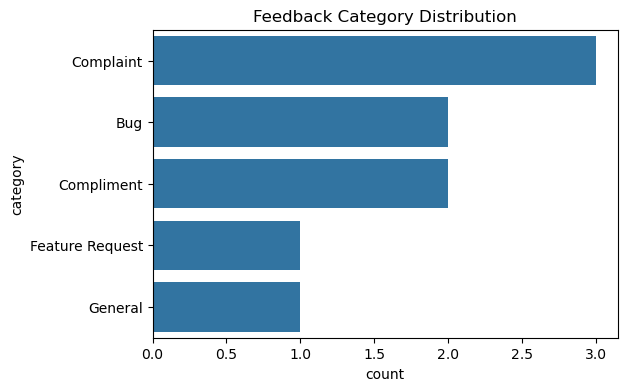

In [7]:
all_categories = [cat for sublist in df['categories'] for cat in sublist]
cat_df = pd.DataFrame({'category': all_categories})

plt.figure(figsize=(6,4))
sns.countplot(y='category', data=cat_df, order=cat_df['category'].value_counts().index)
plt.title("Feedback Category Distribution")
plt.show()

## 💾 Step 8: Save the Processed Data (Optional)

In [8]:
df.to_csv("processed_feedback.csv", index=False)
print("Processed data saved as processed_feedback.csv")

Processed data saved as processed_feedback.csv


## 🔍 Step 9: Display Final Processed Feedback

In [9]:
for i, row in df.iterrows():
    display.display(display.Markdown(f"**{row['feedback']}**"))
    display.display(display.Markdown(f"- **Categories**: {', '.join(row['categories'])}"))
    display.display(display.Markdown(f"- **Sentiment**: {row['sentiment']} | **Urgency**: {row['urgency']}"))
    display.display(display.Markdown("---"))

**The app crashes every time I try to upload a photo.**

- **Categories**: Complaint, Bug

- **Sentiment**: NEGATIVE | **Urgency**: High

---

**Love the new dark mode feature!**

- **Categories**: Compliment

- **Sentiment**: POSITIVE | **Urgency**: Low

---

**Can you add support for multiple accounts?**

- **Categories**: Feature Request, Complaint

- **Sentiment**: NEGATIVE | **Urgency**: High

---

**Customer support was very helpful.**

- **Categories**: Compliment

- **Sentiment**: POSITIVE | **Urgency**: Low

---

**The login process is too slow.**

- **Categories**: Complaint, Bug, General

- **Sentiment**: NEGATIVE | **Urgency**: High

---